In [ ]:
import math, os 
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import sys 
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Pepper"

Pepper__bell___Bacterial_spot  Pepper__bell___healthy


**Get Dataset Directory**

In [ ]:
dataset_dir = "/content/gdrive/My Drive/Pepper"

print(dataset_dir)

/content/gdrive/My Drive/Pepper


In [ ]:
os.listdir(dataset_dir)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

**Get The Categories**


Classes



In [ ]:
categories = list(os.listdir(dataset_dir))
print(categories)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']


In [ ]:
labeled_categories = {}
labels = [i for i in range(len(categories))]
labeled_categories = dict(zip(categories,labels))
print(labels)
print(labeled_categories)
print(categories)

[0, 1]
{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']


In [ ]:
print(labeled_categories.keys())

dict_keys(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy'])


**A Bit of Preprocessing... Resize**

Code Taken ( Few Parts of Preprocessing code is taken from internet )

Loop over Both The Class Folders and read img using CV2, then after resizing appending to data list

In [ ]:
image_size = 200
data = []
targets = []
for category in categories:
  folder_path = os.path.join(dataset_dir,category)
  img_names = os.listdir(folder_path)
  
  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    # read the image
    img = cv.imread(img_path)
    try:
      # Resize using cv.resize with interpolation INTER_AREA (Extra Care i.e. not lose image health)
      resized = cv.resize(img,(image_size,image_size),interpolation = cv.INTER_AREA)
      data.append(resized)
      targets.append(labeled_categories[category])
    except Exception as e:
      print("Error : ",e)

Error :  OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



(2479, 200, 200, 3)
0


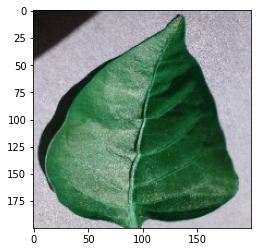

In [ ]:
# Testing Images - just checking
import matplotlib.pyplot as plt

test = np.array(data)
print(test.shape)
print(targets[200])
plt.imshow(test[2478],cmap = plt.cm.gray)
plt.show()

In [ ]:
# Normalize the data (0-1)
# Reference Week 4 (Data Normalization)
normalized_data = np.array(data)/255.0
print(normalized_data.shape)

targets = np.array(targets,dtype="int16")
# To_categorical -> if belong to class 1 else 0
new_targets = to_categorical(targets)
print(new_targets[0])
print(labeled_categories)

# Recommended By Sir Faisal - in AI course (Don't Know its use it!)
np.save("normalized_data",normalized_data)
np.save("target",new_targets)


(2479, 200, 200, 3)
[1. 0.]
{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}


Below is funcion to get Key from Value from dictionary

CustomFunction written

In [ ]:
#  pass the key i.e. 0 -> first_class_name
def get_key(val):
    for key, value in labeled_categories.items():
         if val == value:
             return key

**Sklearn.model_selection import train_test_split splits data into train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target =train_test_split(normalized_data,new_targets,test_size=0.2)
print(test_data.shape)
print(train_data.shape)

(496, 200, 200, 3)
(1983, 200, 200, 3)


In [ ]:
# Train Test Split == 80/20 (1st)

In [ ]:
# train_data[0].shape
# plt.imshow(train_data[0],cmap = plt.cm.gray)

In [ ]:
train_target = np.array(train_target,dtype="int16")


In [ ]:
train_target

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int16)

**Building the CNN architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dropout , Activation , Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras


In [ ]:
model = Sequential()
# First conv layer
model.add(layers.Conv2D(32,(5,5),activation="relu",input_shape=normalized_data.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,activation="softmax"))




CheckPoints are used to save the model -> Reference Tenserflow.keras.org (save and load model)

In [ ]:
checkpoint_dir = '/content/gdrive/My Drive/third_pepper_model_80_20'
checkpoint = ModelCheckpoint(filepath=checkpoint_dir, 
                            frequency = "epoch",
                            save_weights_only = False,
                             verbose= True)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )


In [ ]:
# checkpoint = ModelCheckpoint('Model-{epoch:03d}.model',monitor="val_loss",verbose=0,save_best_only=True,mode='auto')
history = model.fit(train_data,train_target,callbacks=[checkpoint],validation_split=0.2,epochs=10,batch_size=32)



Epoch 1/10
50/50 [==============================] - 165s 3s/step - loss: 0.6742 - accuracy: 0.6103 - val_loss: 0.5745 - val_accuracy: 0.7254

Epoch 00001: saving model to /content/gdrive/My Drive/third_pepper_model_80_20
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/third_pepper_model_80_20/assets
Epoch 2/10
50/50 [==============================] - 163s 3s/step - loss: 0.4251 - accuracy: 0.8430 - val_loss: 0.2668 - val_accuracy: 0.8967

Epoch 00002: saving model to /content/gdrive/My Drive/third_pepper_model_80_20
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/third_pepper_model_80_20/assets
Epoch 3/10
50/50 [==============================] - 163s 3s/step - loss: 0.2020 - accuracy: 0.9243 - val_loss: 0.1547 - val_accuracy: 0.9521

Epoch 00003: saving model to /content/gdrive/My Drive/third_pepper_model_80_20
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/third_pepper_model_80_20/assets
Epoch 4/10
50/50 [==============================] - 162s 3s/s

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

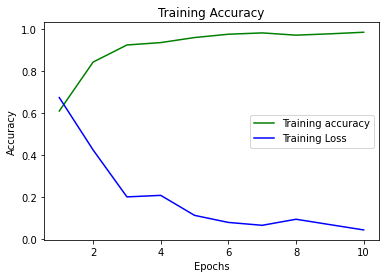

In [ ]:
epochs = range(1,11)
plt.plot(epochs,history.history['accuracy'],'g', label='Training accuracy')
plt.plot(epochs,history.history['loss'],'b',label='Training Loss')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Test Accuracy Check**

In [ ]:
test_target= np.array(test_target,dtype="int32")
test_loss,test_acc = model.evaluate(test_data,test_target)
print(test_acc)

16/16 [==============================] - 13s 787ms/step - loss: 0.3361 - accuracy: 0.9899
0.9899193644523621


[0 1]


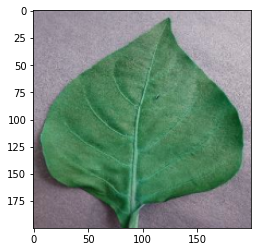

In [ ]:
name = test_data[110].copy()
print(test_target[110])
name_graph = name.reshape((200,200,3))
name = name.reshape((1,200,200,3))
import matplotlib.pyplot as plt
plt.imshow(name_graph,cmap = plt.cm.binary)
plt.show()


In [ ]:
ons = model.predict(test_data)
print(len(predictions))

# np.argmax(predictions)
# get_key(np.argmax(predictions))

496


In [ ]:
y_pred_bool = np.argmax(predictions, axis=1)

y = np.argmax(test_target, axis=-1)
print(classification_report(y, y_pred_bool))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       176
           1       0.99      0.99      0.99       320

    accuracy                           0.99       496
   macro avg       0.99      0.99      0.99       496
weighted avg       0.99      0.99      0.99       496



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred_bool)
print(cm)

[[174   2]
 [  3 317]]


**Below, i am loading an image outside this dataset to check**

[[0.5423886 0.4576114]]
0
Pepper__bell___Bacterial_spot


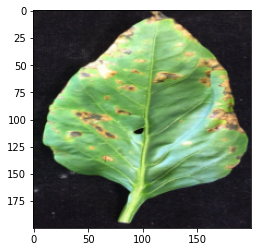

In [ ]:
leaf_bacSpot ="/content/gdrive/My Drive/leaf.png"

img_leaf = cv.imread(leaf_bacSpot)

img_leaf = cv.cvtColor(img_leaf,cv.COLOR_BGR2RGB)
# Preprocess
resized_leaf = cv.resize(img_leaf,(200,200),interpolation = cv.INTER_AREA)
resized_leaf = resized_leaf/255.0
plt.imshow(resized_leaf)
resized_leaf = resized_leaf.reshape((1,200,200,3))

# Prediction using my Trained model

predictions = new_model.predict(resized_leaf)
print(predictions)
print(np.argmax(predictions))
print(get_key(np.argmax(predictions)))


**Load Saved Model**

In [ ]:
new_model = keras.models.load_model('/content/gdrive/My Drive/first_pepper_model')

# print(new_model.evaluate(test_data,test_target))